In [4]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)

# Data

In [60]:
no2_results <- "/home/pieter/Documents/GemeenteNijmegen/smartemission/etl/calibration/io/performance/001475697779_NO2_Waarden_grid_search_scores.csv"

In [61]:
data <- data.table(read.csv(no2_results))
head(data)

X,mean_test_score,param_filter__alpha,param_mlp__activation,param_mlp__alpha,param_mlp__batch_size,param_mlp__early_stopping,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,param_mlp__learning_rate_init,⋯,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,std_test_score
0,-1.83428743,3.171782e-02,logistic,5.157217e-02,auto,True,"(103, 97)",invscaling,9.184080e-06,⋯,-2.1472729,-1.69936682,-1.89433858,-1.93750597,-1.76516960,-1.61407991,-1.88270964,-1.92544209,-1.64270136,0.160226017
1,0.04110426,7.081359e-03,logistic,3.624710e-04,auto,True,"(71, 46)",invscaling,2.701157e-03,⋯,0.0485663,0.02970017,0.05102549,0.04136299,0.04351684,0.04241581,0.03139139,0.04208831,0.03987099,0.006571004
2,0.28374207,4.592157e-04,relu,1.469124e-05,auto,True,"(84, 18)",adaptive,2.808581e-05,⋯,0.2841828,0.32814262,0.29854666,0.29474118,0.29173211,0.27474245,0.22102818,0.27536416,0.28519844,0.026795388
3,0.26980445,1.818962e-06,tanh,1.155302e-05,auto,True,"(135, 68)",adaptive,2.440153e-05,⋯,0.2727050,0.29984455,0.27253821,0.25891232,0.28226859,0.26921325,0.23831250,0.26828803,0.26615765,0.015634644
4,0.44583427,7.207262e-01,tanh,1.278969e-03,auto,True,"(149, 134)",adaptive,2.239896e-02,⋯,0.4627052,0.47878394,0.44580399,0.45502055,0.45906880,0.42715764,0.39061747,0.44846859,0.44488228,0.023653532
5,-1.93794412,1.568669e-02,tanh,1.536816e-05,auto,True,"(84, 116)",invscaling,3.957826e-06,⋯,-2.2934601,-1.76796322,-1.96298903,-1.97815233,-1.85412353,-1.79587894,-1.92668676,-2.02498705,-1.83725607,0.150029174


# Best 

In [62]:
best_df <- data %>% 
    filter(rank(-mean_test_score) < 5) %>%
    select(mean_test_score, params, param_filter__alpha)
best_df

mean_test_score,params,param_filter__alpha
0.4734432,"{'mlp__learning_rate_init': 0.028911424989116918, 'mlp__power_t': 0.14365537189660138, 'filter__alpha': 0.27664673982142762, 'mlp__alpha': 0.017484079417265153, 'mlp__hidden_layer_sizes': (101, 104), 'mlp__early_stopping': True, 'mlp__learning_rate': 'adaptive', 'mlp__nesterovs_momentum': False, 'mlp__momentum': 0.59689424024577131, 'mlp__batch_size': 'auto', 'mlp__activation': 'tanh', 'mlp__max_iter': 10000, 'mlp__solver': 'sgd'}",0.276646740
0.4833539,"{'mlp__max_iter': 10000, 'mlp__nesterovs_momentum': True, 'mlp__power_t': 0.24961777349459524, 'mlp__alpha': 0.001350850267756745, 'mlp__early_stopping': True, 'mlp__momentum': 0.41926154492362788, 'mlp__hidden_layer_sizes': (33, 16), 'mlp__solver': 'sgd', 'mlp__learning_rate': 'adaptive', 'mlp__learning_rate_init': 0.027842603578321252, 'filter__alpha': 0.0097972427184488658, 'mlp__batch_size': 'auto', 'mlp__activation': 'tanh'}",0.009797243
0.4781394,"{'mlp__max_iter': 10000, 'mlp__nesterovs_momentum': True, 'mlp__power_t': 0.22290301806487156, 'mlp__alpha': 0.0070722653544792709, 'mlp__early_stopping': True, 'mlp__momentum': 0.61972702925805545, 'mlp__hidden_layer_sizes': (105, 43), 'mlp__solver': 'sgd', 'mlp__learning_rate': 'adaptive', 'mlp__learning_rate_init': 0.00053240231264702997, 'filter__alpha': 0.018164467207452861, 'mlp__batch_size': 'auto', 'mlp__activation': 'tanh'}",0.018164467
0.4813040,"{'mlp__max_iter': 10000, 'mlp__nesterovs_momentum': False, 'mlp__power_t': 0.96820936599157437, 'mlp__alpha': 0.0044182085337602008, 'mlp__early_stopping': True, 'mlp__momentum': 0.48927830559484098, 'mlp__hidden_layer_sizes': (59, 7), 'mlp__solver': 'sgd', 'mlp__learning_rate': 'adaptive', 'mlp__learning_rate_init': 0.0043773317510763842, 'filter__alpha': 0.0072306308311492927, 'mlp__batch_size': 'auto', 'mlp__activation': 'tanh'}",0.007230631


# Parameters

mean_test_score,param_filter__alpha,param_mlp__activation,param_mlp__alpha,param_mlp__batch_size,param_mlp__early_stopping,param_mlp__hidden_layer_sizes_1,param_mlp__hidden_layer_sizes_2,param_mlp__learning_rate,param_mlp__learning_rate_init,param_mlp__max_iter,param_mlp__momentum,param_mlp__nesterovs_momentum,param_mlp__power_t,param_mlp__solver,rank_test_score,std_test_score,top,stderr_test_score,best_filter_range
0.4734432,0.276646740,tanh,1.748408e-02,auto,True,101,104,adaptive,0.0289114250,10000,0.5968942402,False,0.1436554,sgd,4,0.02200249,TRUE,0.007334163,FALSE
0.4635439,0.015540678,tanh,3.376977e-05,auto,True,29,79,adaptive,0.0154767272,10000,0.0004779669,False,0.2830335,sgd,7,0.02992338,TRUE,0.009974459,TRUE
0.4833539,0.009797243,tanh,1.350850e-03,auto,True,33,16,adaptive,0.0278426036,10000,0.4192615449,True,0.2496178,sgd,1,0.03279946,TRUE,0.010933155,TRUE
0.4633646,0.009355748,tanh,8.467079e-02,auto,True,68,19,constant,0.0022975919,10000,0.9081882955,False,0.5211751,sgd,8,0.03483400,TRUE,0.011611333,TRUE
0.4781394,0.018164467,tanh,7.072265e-03,auto,True,105,43,adaptive,0.0005324023,10000,0.6197270293,True,0.2229030,sgd,3,0.02628559,TRUE,0.008761862,TRUE
0.4813040,0.007230631,tanh,4.418209e-03,auto,True,59,7,adaptive,0.0043773318,10000,0.4892783056,False,0.9682094,sgd,2,0.01919871,TRUE,0.006399571,TRUE
0.4632292,0.009497358,tanh,6.542608e-05,auto,True,73,60,adaptive,0.0068008651,10000,0.6922263626,True,0.7775738,sgd,9,0.03193982,TRUE,0.010646606,TRUE
0.4713824,0.011538754,tanh,9.887718e-06,auto,True,145,107,adaptive,0.0402263139,10000,0.4418404694,False,0.8279988,sgd,6,0.05865193,TRUE,0.019550643,TRUE
0.4721243,0.021699206,tanh,6.464374e-05,auto,True,62,70,adaptive,0.0228018692,10000,0.3105153559,True,0.1751359,sgd,5,0.04835900,TRUE,0.016119668,TRUE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


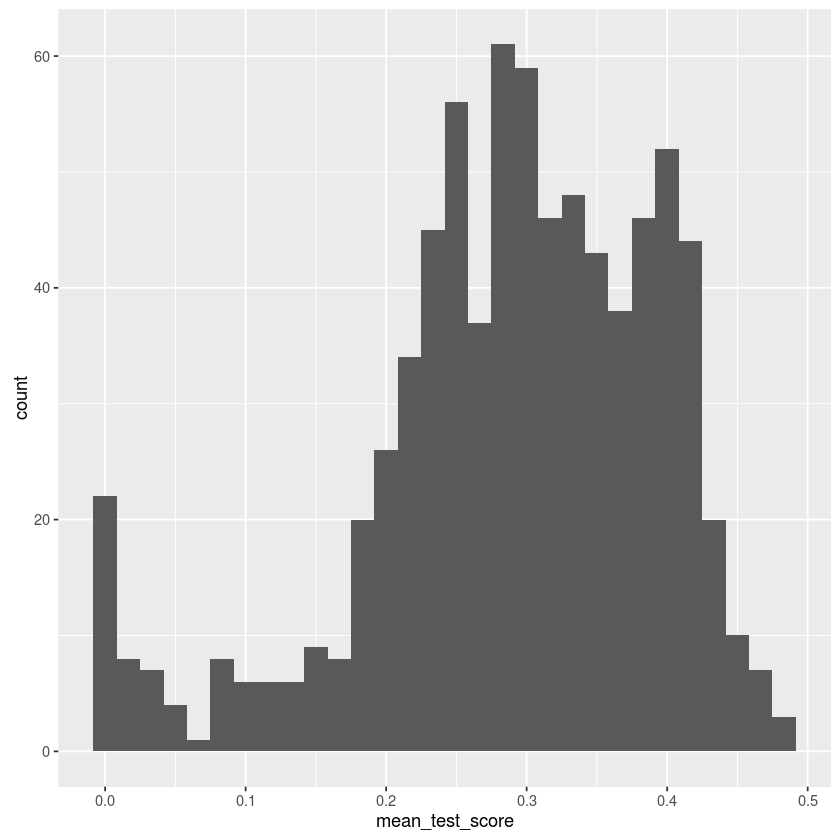

In [200]:
df <- data %>%
    mutate(param_mlp__hidden_layer_sizes = gsub("[()]", "", as.character(param_mlp__hidden_layer_sizes))) %>%
    separate(param_mlp__hidden_layer_sizes, c("param_mlp__hidden_layer_sizes_1", "param_mlp__hidden_layer_sizes_2")) %>%
    mutate(param_mlp__hidden_layer_sizes_1 = as.integer(param_mlp__hidden_layer_sizes_1), 
          param_mlp__hidden_layer_sizes_2 = as.integer(param_mlp__hidden_layer_sizes_2)) %>%
    filter(mean_test_score > 0) %>%
    mutate(rank_test_score = rank(-mean_test_score),
           top = min_rank(rank_test_score) < 10, 
           stderr_test_score = std_test_score / sqrt(9), 
           best_filter_range = param_filter__alpha < 0.1 & param_filter__alpha > 0.001) %>%
    select(-X,-params, -starts_with("split"))
params <- setdiff(names(df), "mean_test_score")
df %>% filter(top == TRUE)
ggplot(df, aes(mean_test_score)) + geom_histogram()

# Parameter: filter__alpha
Best scores for  are between 0.1 and 0.001. Average best score is around 0.01.

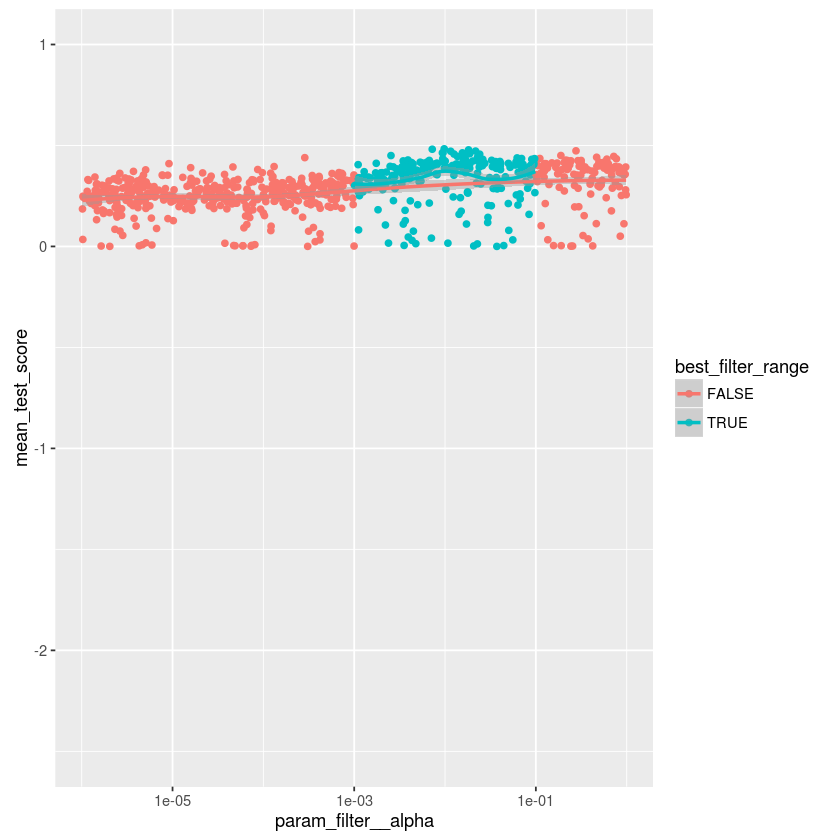

In [64]:
ggplot(df) +
  aes_string(x = params[1], y = "mean_test_score", color = "best_filter_range") +
  geom_point() + 
  scale_x_log10() + 
  ylim(c(-2.5, 1)) +
  geom_smooth() 

# Parameter: mlp__activation
Logistic works worse. Tanh seems better.

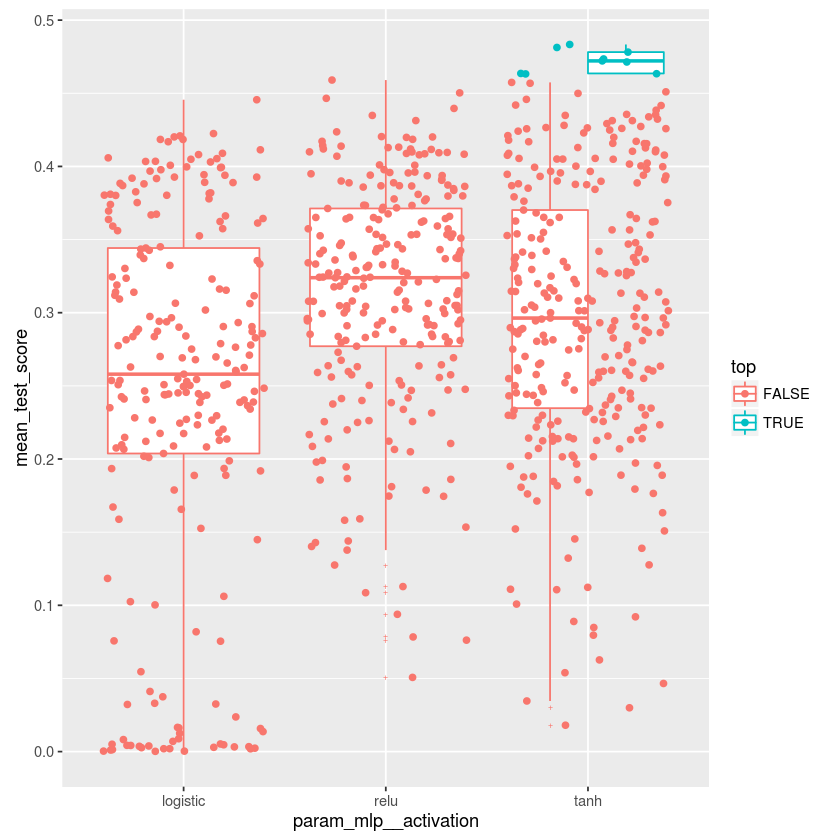

In [65]:
ggplot(df) +
  aes_string(x = params[2], y = "mean_test_score", color = "top") +
  geom_boxplot(outlier.shape = "+") + 
  geom_jitter()

# Parameter: mlp__alpha
No effect

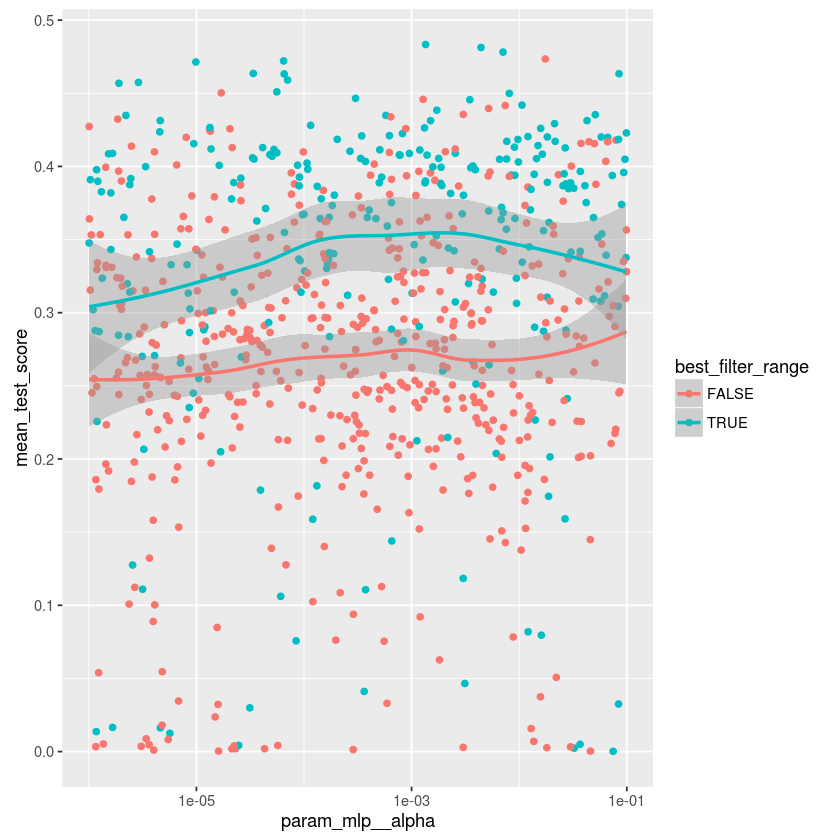

In [72]:
ggplot(df) +
  aes_string(x = params[3], y = "mean_test_score", color = "best_filter_range") +
  geom_point() + 
  scale_x_log10() + 
  geom_smooth() 

# Parameter: mlp__hidden_layer_size
At least hidden layer size of 75

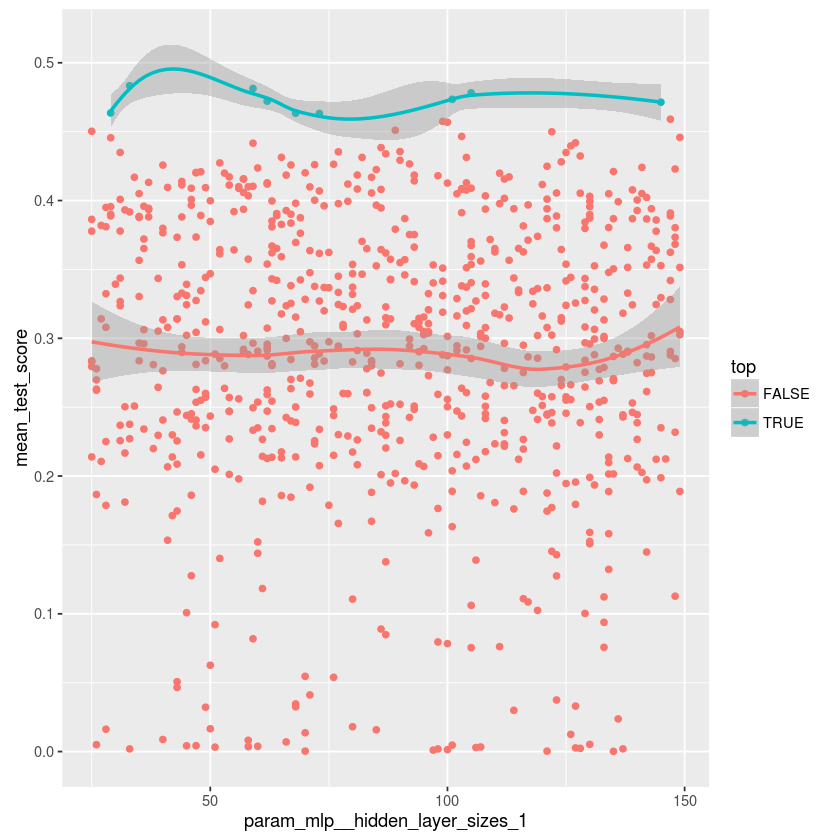

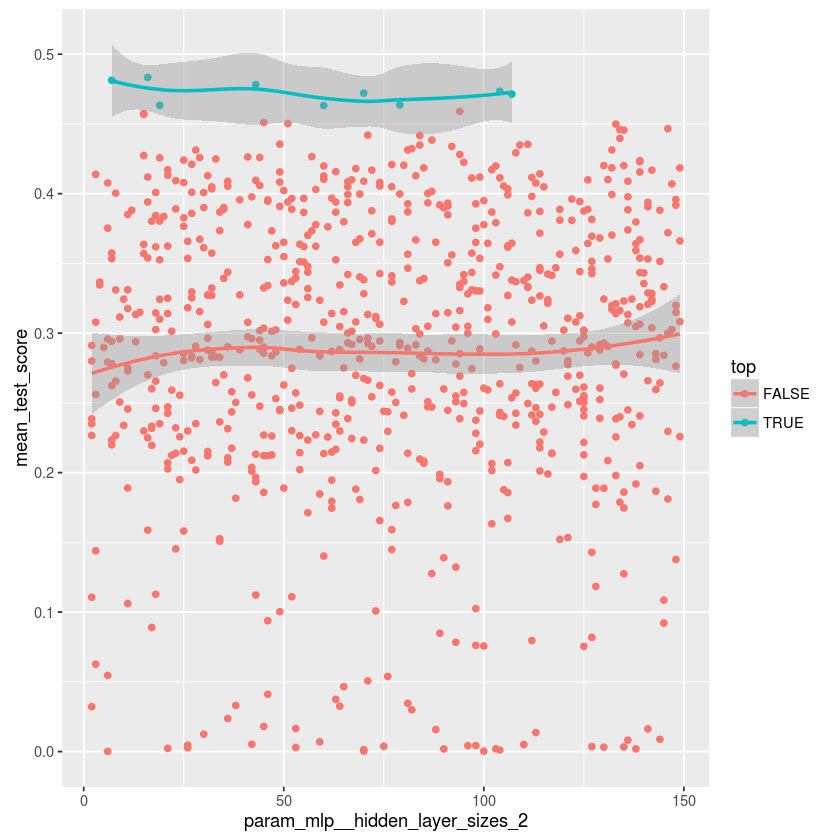

In [171]:
ggplot(df) +
  aes_string(x = params[6], y = "mean_test_score", color = "top") +
  geom_point() + 
  geom_smooth() 
ggplot(df) +
  aes_string(x = params[7], y = "mean_test_score", color = "top") +
  geom_point() + 
  geom_smooth() 

# Parameter: mlp__learning_rate
Adaptive works best

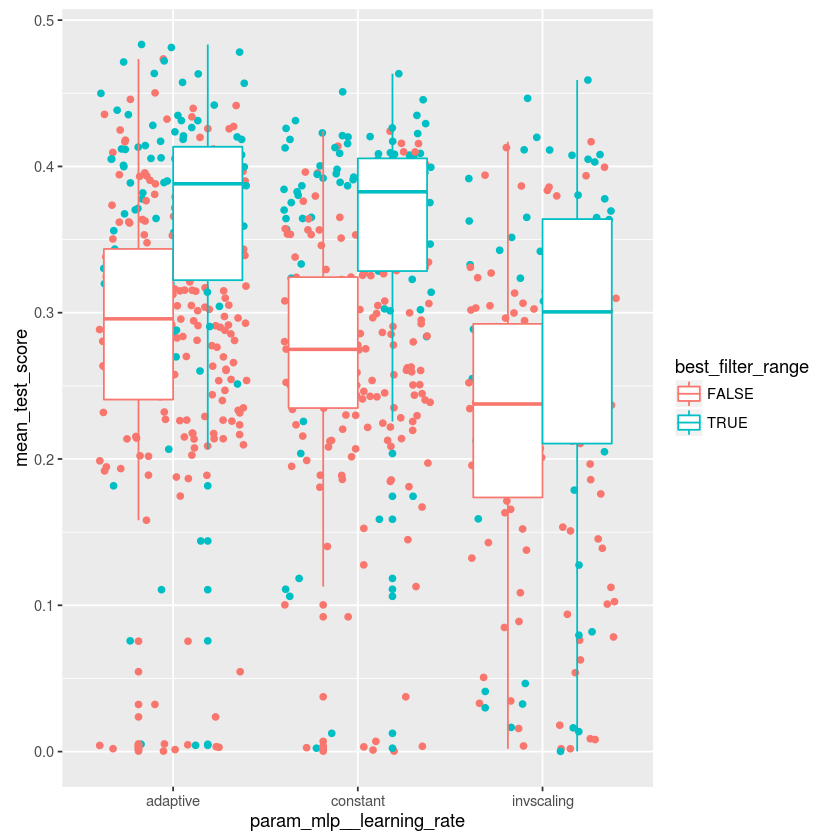

In [177]:
ggplot(df) +
  aes_string(x = params[8], y = "mean_test_score", color = "best_filter_range") +
  geom_jitter() + 
  geom_boxplot()

# Parameter mlp__learning_rate
adaptive with a start 0.01 works best

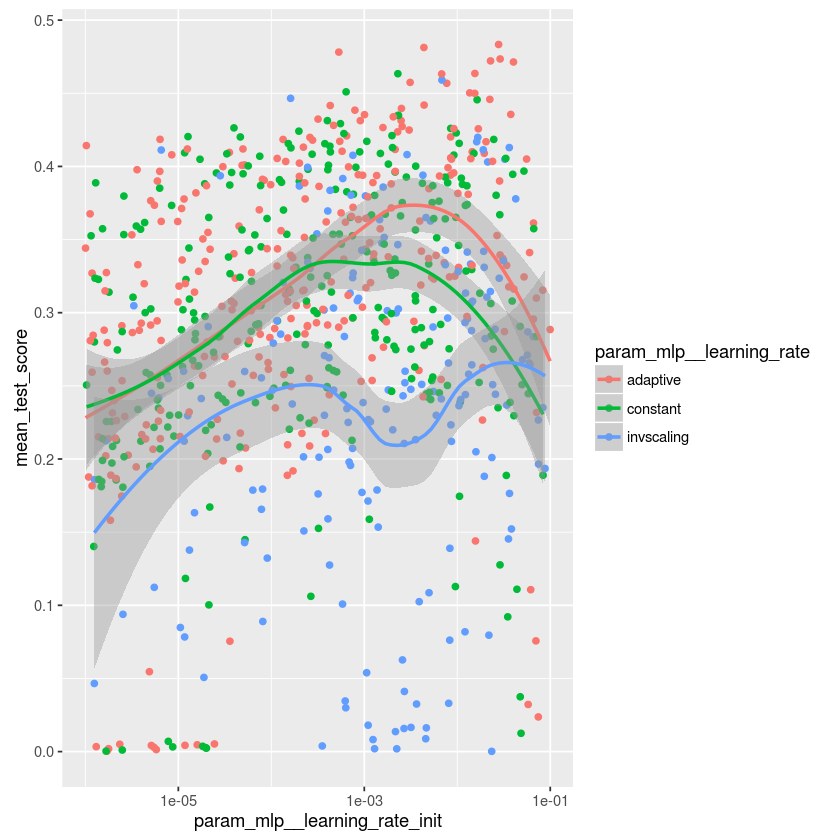

In [184]:
ggplot(df) +
  aes_string(x = params[9], y = "mean_test_score", color = "param_mlp__learning_rate") +
  geom_point() + 
  scale_x_log10() + 
  geom_smooth()

# Parameter mlp__momentum
Around .5 seems to be the best

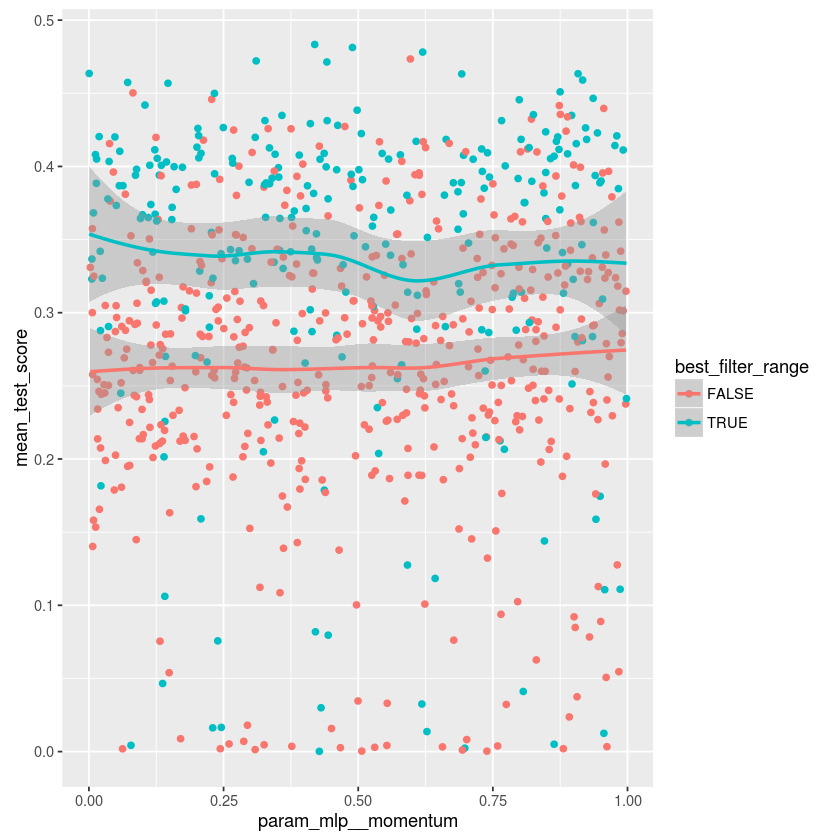

In [192]:
ggplot(df) +
  aes_string(x = params[11], y = "mean_test_score", color = "best_filter_range") +
  geom_point() + 
  geom_smooth()

# Parameter mlp__power_t
Close to zero is best

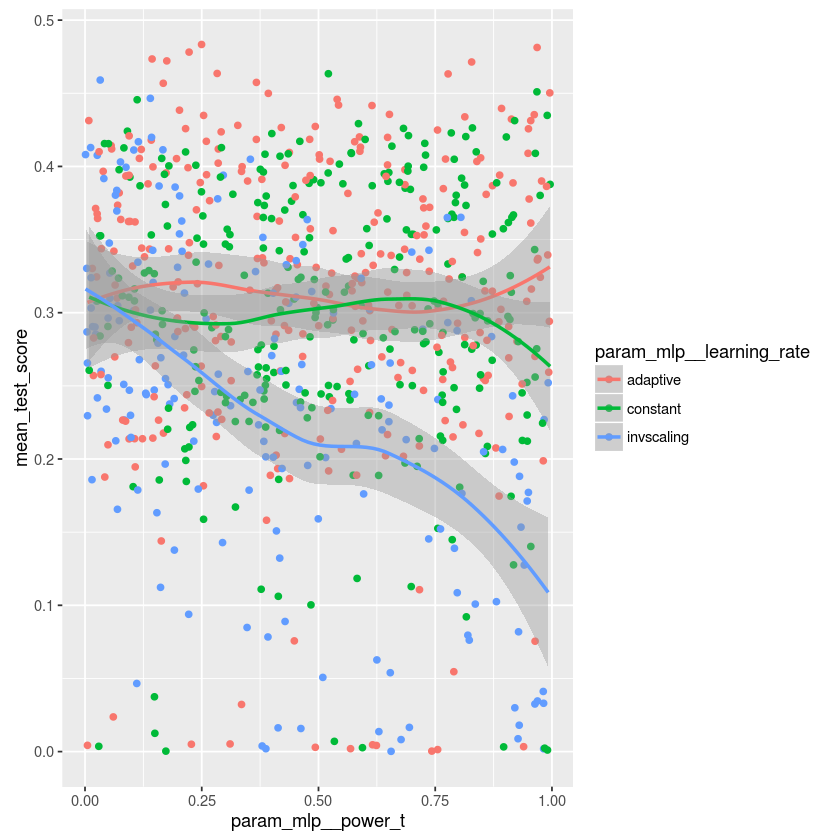

In [196]:
ggplot(df) +
  aes_string(x = params[13], y = "mean_test_score", color = "param_mlp__learning_rate") +
  geom_point() + 
  geom_smooth()

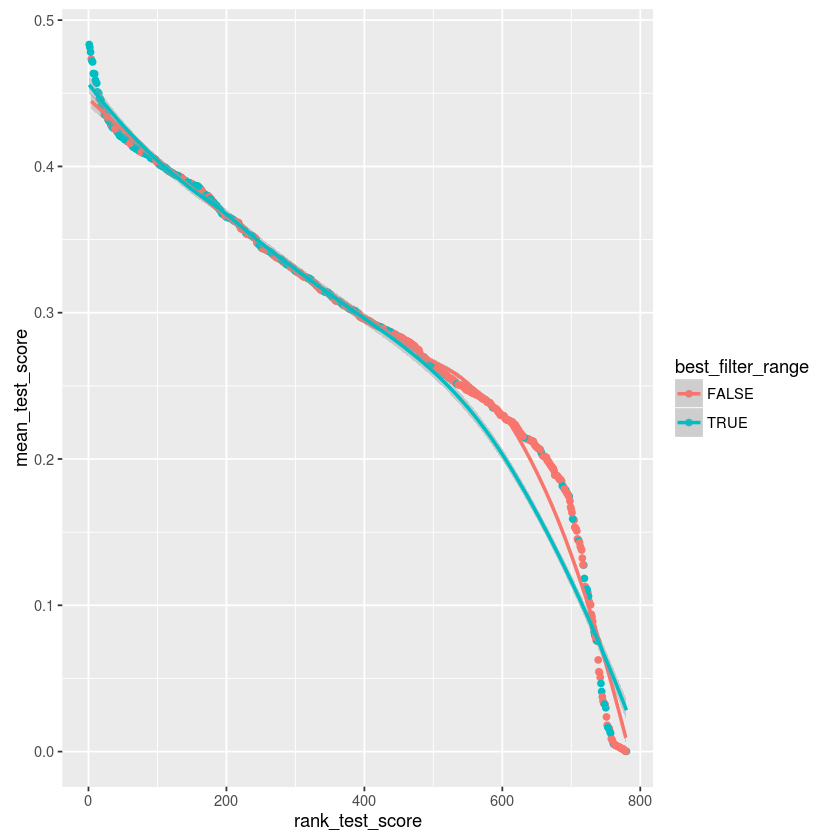